In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from scipy.stats import zscore
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import shap
import logging
import joblib
from flask import Flask, request, jsonify

**DATA EXPLORATION AND PREPROCESSING**

LOADING THE DATA

In [2]:
data=pd.read_csv('/content/MLE-Assignment.csv')

In [3]:
data

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


**BASIC STEPS**

In [4]:
basic_summary = {
    "Shape": data.shape,
    "Missing Values": data.isnull().sum(),
    "First Few Rows": data.head(),
    "Column Info": data.info(),
    "Summary Stats": data.describe()
}
basic_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


{'Shape': (500, 450),
 'Missing Values': hsi_id           0
 0                0
 1                0
 2                0
 3                0
                 ..
 444              0
 445              0
 446              0
 447              0
 vomitoxin_ppb    0
 Length: 450, dtype: int64,
 'First Few Rows':            hsi_id         0         1         2         3         4         5  \
 0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
 1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
 2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
 3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
 4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   
 
           6         7         8  ...       439       440       441       442  \
 0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
 1  0.375671  0.363689  0.373883  ... 

Summary Statistics

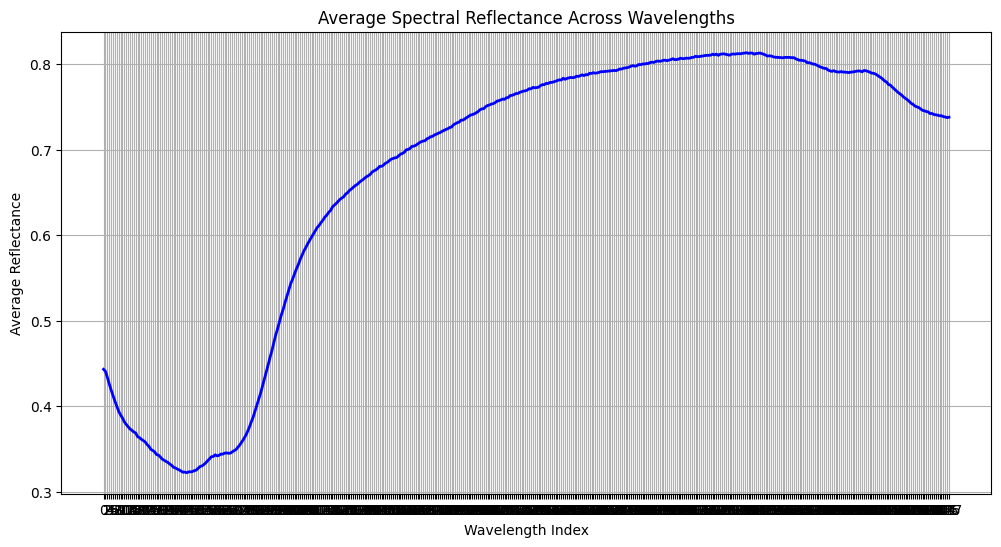

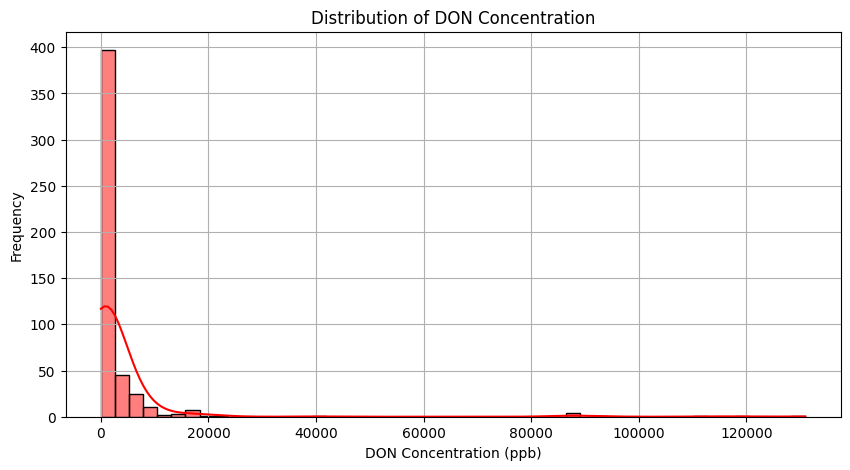

In [5]:
# Drop the identifier column
data.drop(columns=["hsi_id"], inplace=True)

# Visualize spectral data (average reflectance across wavelengths)
plt.figure(figsize=(12, 6))
plt.plot(data.drop(columns=["vomitoxin_ppb"]).mean(), color="blue", linewidth=2)
plt.xlabel("Wavelength Index")
plt.ylabel("Average Reflectance")
plt.title("Average Spectral Reflectance Across Wavelengths")
plt.grid(True)
plt.show()

# Check target variable distribution
plt.figure(figsize=(10, 5))
sns.histplot(data["vomitoxin_ppb"], bins=50, kde=True, color="red")
plt.xlabel("DON Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of DON Concentration")
plt.grid(True)
plt.show()

1.Spectral Reflectance Plot:

**there is no massive jumps, indicating no sensor issues**

2.DON Concentration Distribution:

**The target variable (vomitoxin_ppb) is highly skewed, with some extreme values this tells us the need for scaling or transformation to improve model performance**

**samples have extremely high mycotoxin levels**

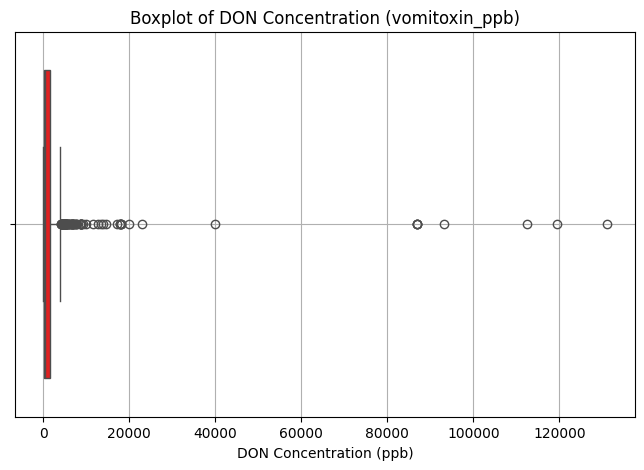

In [6]:
# Boxplot to check for outliers in the target variable (vomitoxin_ppb)
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["vomitoxin_ppb"], color="red")
plt.xlabel("DON Concentration (ppb)")
plt.title("Boxplot of DON Concentration (vomitoxin_ppb)")
plt.grid(True)

**APPLYING LOG FUNCTION BECAUSE WE FOUND THERE IS NO ERROR IN SENSOR IF WE REMOVE OUTLIERS IN THIS CASE WE ARE LOOSING IMPORTANT IMFORMATIONS**

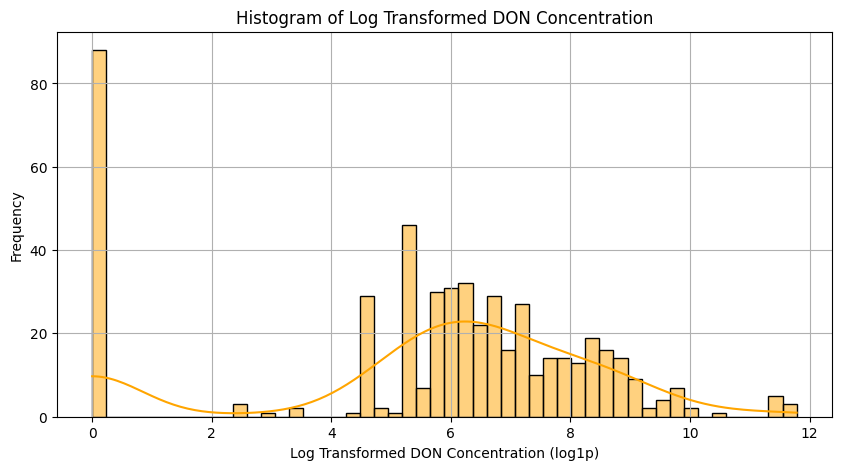

In [7]:
# Apply log transformation to the target variable
data["vomitoxin_ppb_log"] = np.log1p(data["vomitoxin_ppb"])  # log1p avoids log(0) issues

# Plot histogram of transformed target variable
plt.figure(figsize=(10, 5))
sns.histplot(data["vomitoxin_ppb_log"], bins=50, kde=True, color="orange")
plt.xlabel("Log Transformed DON Concentration (log1p)")
plt.ylabel("Frequency")
plt.title("Histogram of Log Transformed DON Concentration")
plt.grid(True)

Text(0.5, 1.0, 'Correlation Heatmap of Selected Spectral Features')

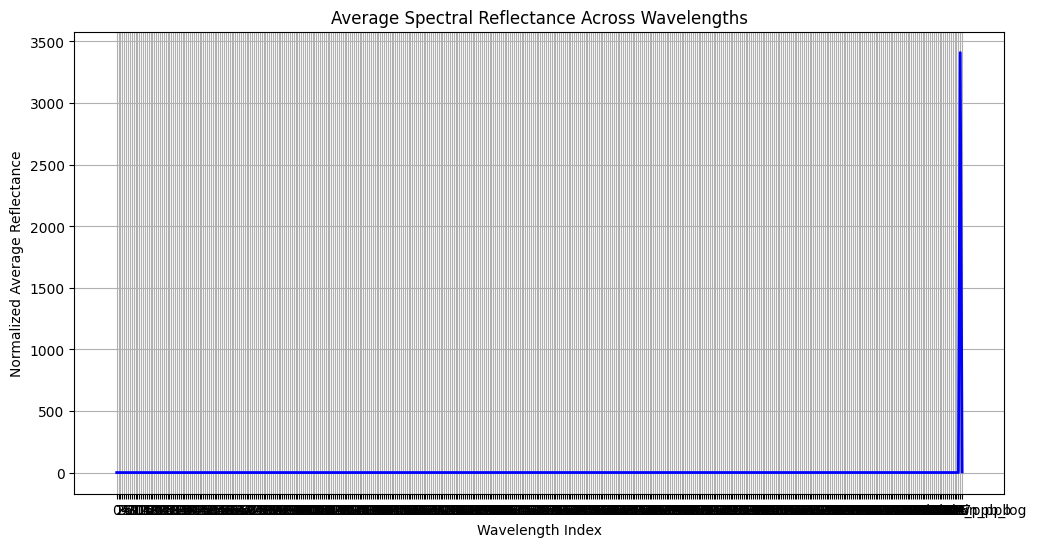

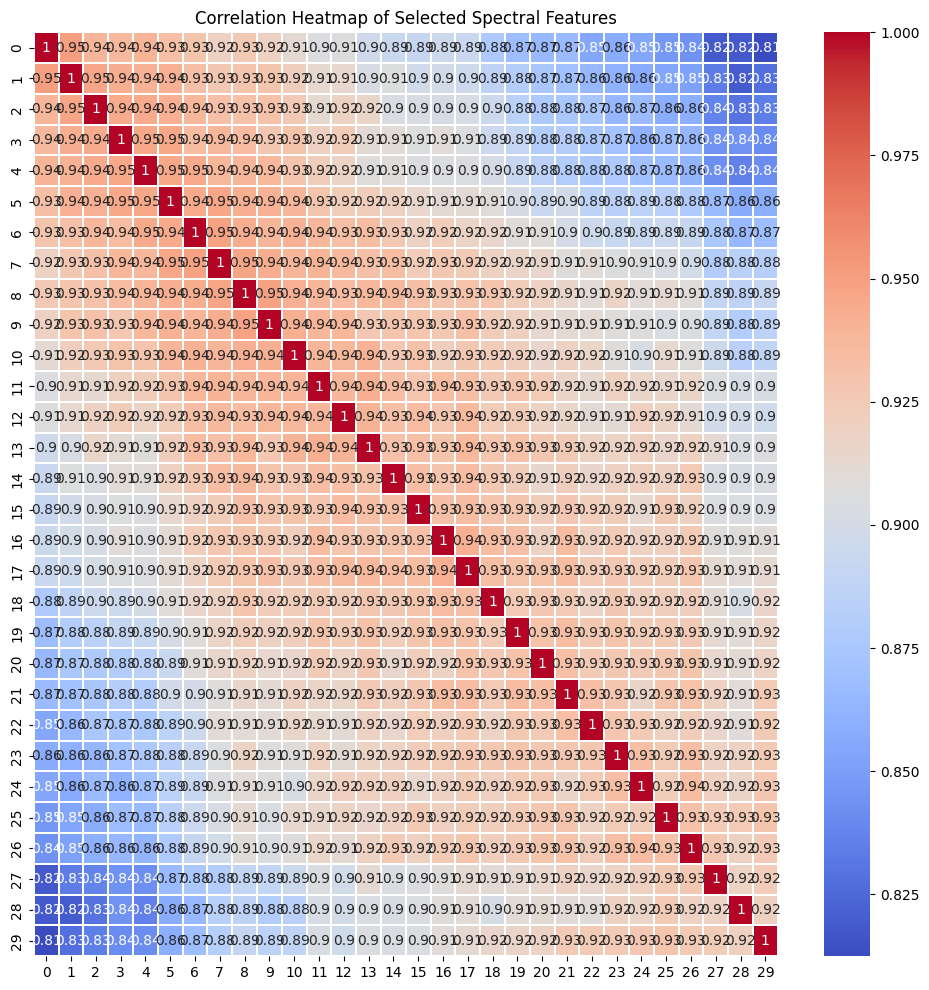

In [8]:
# Line Plot: Average Reflectance Over Wavelengths
plt.figure(figsize=(12, 6))
plt.plot(data.mean(), color="blue", linewidth=2)
plt.xlabel("Wavelength Index")
plt.ylabel("Normalized Average Reflectance")
plt.title("Average Spectral Reflectance Across Wavelengths")
plt.grid(True)


# Heatmap: Correlation Between a Subset of Wavelengths
subset_features = data.columns[:30]  # Select first 30 wavelengths for visualization
plt.figure(figsize=(12, 12))
sns.heatmap(data[subset_features].corr(), cmap="coolwarm", annot=True, linewidths=0.15)
plt.title("Correlation Heatmap of Selected Spectral Features")


In [9]:
# Identify spectral reflectance columns (excluding ID and target variable)
spectral_cols = data.columns[1:-1]  # Exclude 'hsi_id' and 'vomitoxin_ppb' (target variable)

# Normalize spectral data using MinMaxScaler
scaler = MinMaxScaler()
data[spectral_cols] = scaler.fit_transform(data[spectral_cols])

# Detect anomalies using Z-score (threshold |z| > 3)
z_scores = np.abs(zscore(data[spectral_cols]))
anomaly_mask = (z_scores > 3).any(axis=1)

# Create a new column to flag anomalies (1 = Anomalous, 0 = Normal)
data["is_anomalous"] = anomaly_mask.astype(int)

# Count normal vs anomalous samples
anomaly_counts = data["is_anomalous"].value_counts()

# Display count of normal vs anomalous samples
anomaly_counts

<ipython-input-9-c120610f02e7>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["is_anomalous"] = anomaly_mask.astype(int)


,count
is_anomalous,
0,465
1,35


<ipython-input-10-811e4c2e6f86>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["mean_reflectance"] = data[spectral_cols].mean(axis=1)


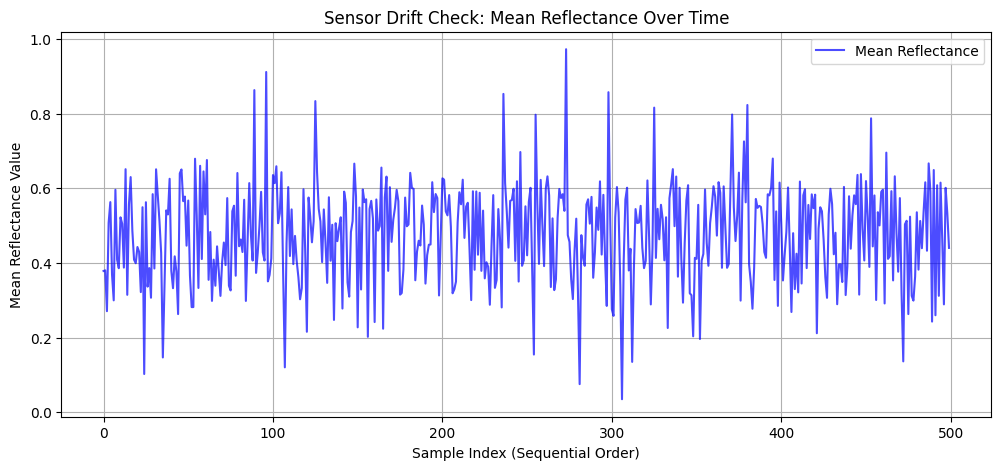

<ipython-input-10-811e4c2e6f86>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["std_reflectance"] = data[spectral_cols].std(axis=1)


4

In [10]:
#Advanced Data Quality Checks:

data["mean_reflectance"] = data[spectral_cols].mean(axis=1)

# Plot rolling mean to check for sensor drift over time
plt.figure(figsize=(12, 5))
plt.plot(data["mean_reflectance"], label="Mean Reflectance", color="blue", alpha=0.7)
plt.xlabel("Sample Index (Sequential Order)")
plt.ylabel("Mean Reflectance Value")
plt.title("Sensor Drift Check: Mean Reflectance Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Compute standard deviation of spectral values for consistency check
data["std_reflectance"] = data[spectral_cols].std(axis=1)

# Identify samples with unusually high standard deviation (potential inconsistencies)
threshold_std = data["std_reflectance"].mean() + 3 * data["std_reflectance"].std()
inconsistent_samples = data[data["std_reflectance"] > threshold_std]

# Count of inconsistent samples
num_inconsistent_samples = inconsistent_samples.shape[0]
num_inconsistent_samples

Sensor Drift:


No strong trend is visible, so sensor drift appears minimal.

Data Inconsistency Detection:

5 samples have an unusually high standard deviation in spectral values.

These could be due to sensor noise or true rare samples **bold text**

In [11]:
data


,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,vomitoxin_ppb,vomitoxin_ppb_log,is_anomalous,mean_reflectance,std_reflectance
0,0.416181,0.432294,0.510485,0.361585,0.411656,0.365379,0.382911,0.305546,0.382076,0.475299,...,0.330556,0.324067,0.376234,0.340562,0.359537,0.008397,7.003974,0,0.378415,0.052908
1,0.415797,0.458322,0.484244,0.453758,0.466945,0.478181,0.467686,0.401405,0.506341,0.466313,...,0.342318,0.282899,0.335534,0.337359,0.320439,0.007634,6.908755,0,0.380088,0.049716
2,0.389023,0.323124,0.363833,0.365593,0.299035,0.292418,0.294413,0.246585,0.314003,0.296242,...,0.275842,0.225416,0.228563,0.265252,0.260075,0.009924,7.170888,0,0.270604,0.057441
3,0.468837,0.757663,0.731006,0.705884,0.766564,0.804758,0.809852,0.703279,0.683790,0.719998,...,0.479585,0.446448,0.463770,0.501336,0.432737,0.009924,7.170888,0,0.507659,0.064712
4,0.483352,0.817355,0.756362,0.818619,0.777502,0.764411,0.809995,0.764764,0.730135,0.802499,...,0.509626,0.461215,0.556841,0.517629,0.479541,0.001679,5.398163,0,0.563050,0.071026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.633232,0.645891,0.618834,0.613222,0.588005,0.642191,0.668643,0.674934,0.671601,...,0.407148,0.398216,0.458644,0.460307,0.403321,0.009160,7.090910,0,0.463680,0.061358
496,0.409367,0.424194,0.393003,0.371438,0.229638,0.315411,0.407557,0.303772,0.413308,0.313766,...,0.187814,0.200053,0.222461,0.196714,0.213448,0.000000,0.000000,0,0.288896,0.056926
497,0.486526,0.877387,0.883133,0.900208,0.895456,0.793066,0.826963,0.869136,0.800528,0.836915,...,0.532618,0.507946,0.542271,0.525792,0.593807,0.000000,0.000000,0,0.601351,0.072772
498,0.464595,0.866527,0.837779,0.682176,0.887212,0.814649,0.824269,0.795776,0.840339,0.786914,...,0.505918,0.424851,0.495036,0.487122,0.490651,0.000000,0.000000,0,0.532997,0.070156


2.Model Training

In [12]:
# Define features and target
X = data.drop(columns=["vomitoxin_ppb"])  # Remove target & non-numeric column
y = data["vomitoxin_ppb"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple neural network model
mlp_model = MLPRegressor(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=500, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_nn = mlp_model.predict(X_test)


# Evaluate model
mlp_test_score = mlp_model.score(X_test, y_test)
print(f"Simple Neural Network Test R² Score: {mlp_test_score:.4f}")

# Evaluate models with K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring="r2")
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring="r2")

# Compute cross-validation R² scores
rf_cv = rf_cv_scores
xgb_cv = xgb_cv_scores

# Extract the best scores per fold
rf_best_score = max(rf_cv_scores)
xgb_best_score = max(xgb_cv_scores)

print(f"Random Forest CV Scores per fold: {rf_cv_scores}")
print(f"XGBoost CV Scores per fold: {xgb_cv_scores}")
print(f"Random Forest Best Cross-Validation R² Score: {rf_best_score:.4f}")
print(f"XGBoost Best Cross-Validation R² Score: {xgb_best_score:.4f}")

Simple Neural Network Test R² Score: 0.4347
Random Forest CV Scores per fold: [0.98857483 0.92424808 0.99556889 0.97319176 0.99427954]
XGBoost CV Scores per fold: [0.91239863 0.96370445 0.90405769 0.99287203 0.9994372 ]
Random Forest Best Cross-Validation R² Score: 0.9956
XGBoost Best Cross-Validation R² Score: 0.9994


HYPERPARAMETER TUNING

SINCE WE GOT BEST SCORE IN RANDOM FOREST AS WELL AS IN XGBOOST NO NEED TO USE HYPERPARAMETER TUNING TECHNIQUE

 Model Evaluation

In [13]:
# Evaluate models
for name, y_pred in zip(["Random Forest", "XGBoost", "Neural Network"], [y_pred_rf, y_pred_xgb, y_pred_nn]):
    print(f"{name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}\n")


Random Forest Evaluation:
MAE: 0.0014
RMSE: 0.0084
R² Score: 0.9956

XGBoost Evaluation:
MAE: 0.0025
RMSE: 0.0199
R² Score: 0.9757

Neural Network Evaluation:
MAE: 0.0544
RMSE: 0.0960
R² Score: 0.4347



Text(0.5, 1.0, 'Actual vs. Predicted DON Concentration')

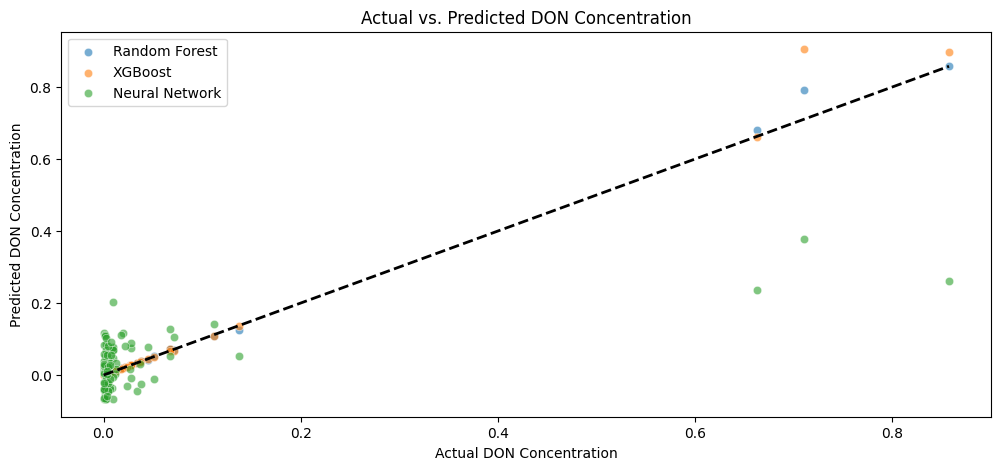

In [14]:
# Visualization: Scatter Plot for Predictions
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_xgb, label="XGBoost", alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_nn, label="Neural Network", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.legend()
plt.title("Actual vs. Predicted DON Concentration")

Text(0.5, 1.0, 'Residual Analysis')

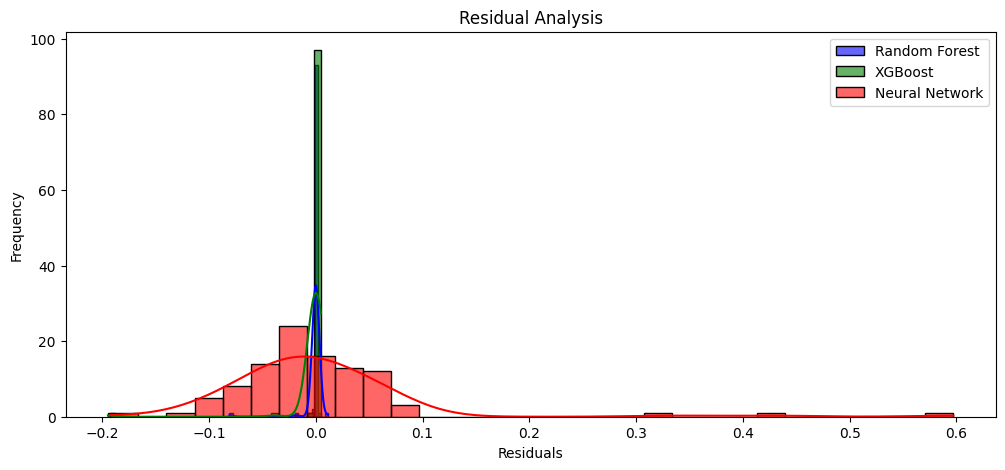

In [15]:
# Residual Analysis
plt.figure(figsize=(12, 5))
sns.histplot(y_test - y_pred_rf, bins=30, kde=True, label="Random Forest", color="blue", alpha=0.6)
sns.histplot(y_test - y_pred_xgb, bins=30, kde=True, label="XGBoost", color="green", alpha=0.6)
sns.histplot(y_test - y_pred_nn, bins=30, kde=True, label="Neural Network", color="red", alpha=0.6)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.title("Residual Analysis")

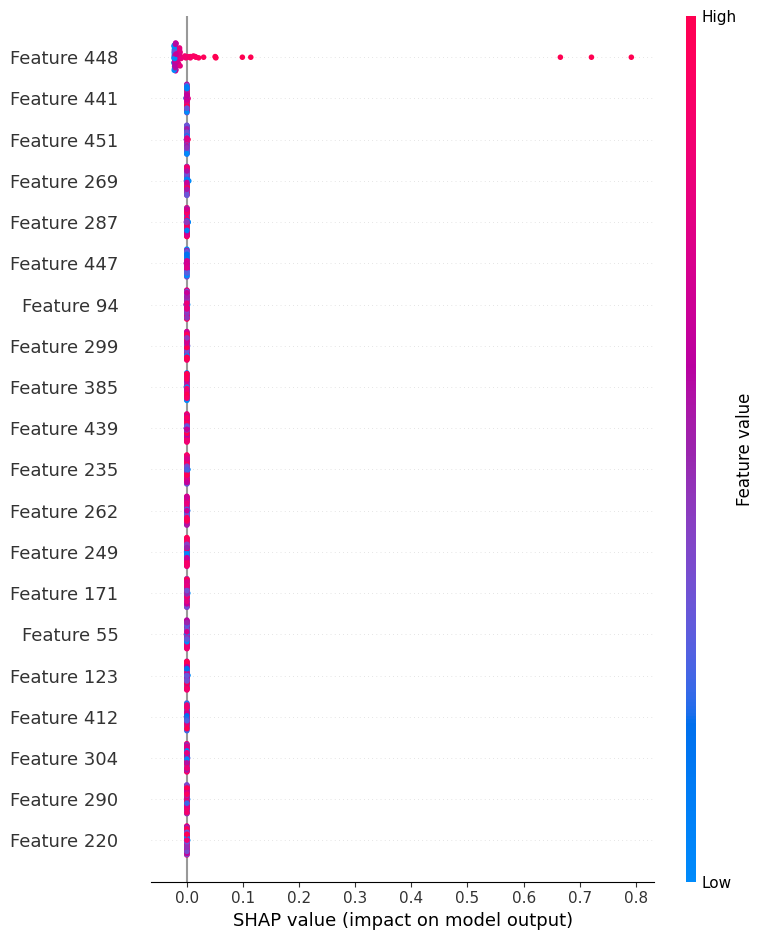

In [19]:
# SHAP Interpretation for Random Forest
explainer_rf = shap.Explainer(rf_model, X_train)
shap_values_rf = explainer_rf(X_test)
shap.summary_plot(shap_values_rf, X_test)


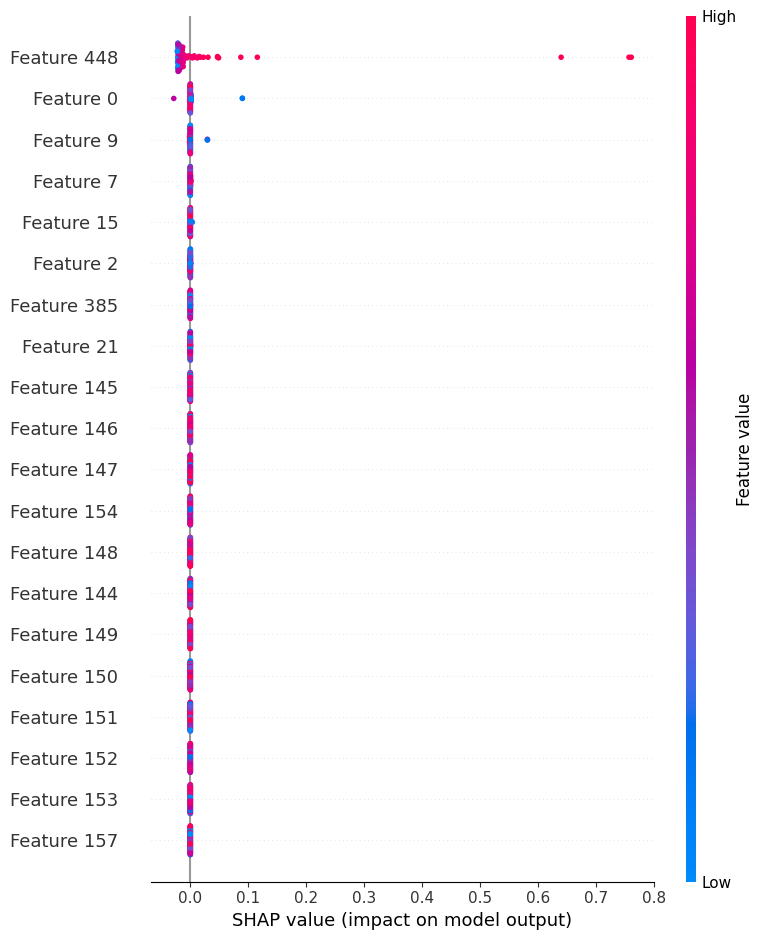

In [20]:
# SHAP Interpretation for XGBoost
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

Pipeline Integration and Production-Readiness

In [25]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Save models
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(mlp_model, "neural_network_model.pkl")
joblib.dump(scaler, "scaler.pkl")

logger.info("Models trained and saved successfully.")

# Evaluate models
for name, y_pred in zip(["Random Forest", "XGBoost", "Neural Network"], [y_pred_rf, y_pred_xgb, y_pred_nn]):
    logger.info(f"{name} Evaluation:")
    logger.info(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    logger.info(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    logger.info(f"R² Score: {r2_score(y_test, y_pred):.4f}")

In [27]:
# Flask API for deployment
app = Flask('Corn chemical prediction')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = np.array(data['features']).reshape(1, -1)
        features = scaler.transform(features)

        rf_pred = rf_model.predict(features)[0]
        xgb_pred = xgb_model.predict(features)[0]
        nn_pred = mlp_model.predict(features)[0]

        return jsonify({
            "RandomForest Prediction": rf_pred,
            "XGBoost Prediction": xgb_pred,
            "NeuralNetwork Prediction": nn_pred
        })
    except Exception as e:
        logger.error(f"Error during prediction: {str(e)}")
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app 'Corn chemical prediction'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
